# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.135694e+01     7.169335e+00
 * time: 0.005117177963256836
     1     2.812274e+01     4.866819e+00
 * time: 0.015292167663574219
     2     2.254520e+01     7.564999e+00
 * time: 0.041059017181396484
     3     1.435804e+01     2.490013e+00
 * time: 0.0711519718170166
     4     1.165193e+01     1.618447e+00
 * time: 0.14434814453125
     5     1.076321e+01     9.321053e-01
 * time: 0.16688895225524902
     6     1.021942e+01     1.943141e+00
 * time: 0.1849830150604248
     7     9.694639e+00     8.253949e-01
 * time: 0.20362305641174316
     8     9.382016e+00     6.646387e-01
 * time: 0.2226581573486328
     9     9.150818e+00     6.507595e-01
 * time: 0.2410891056060791
    10     8.990247e+00     7.548958e-01
 * time: 0.25890207290649414
    11     8.897560e+00     4.823892e-01
 * time: 0.2767651081085205
    12     8.888152e+00     7.479671e-01
 * time: 0.29024505615234375
    13     8.772922e+00     6.076274e-01
 * time: 0.30

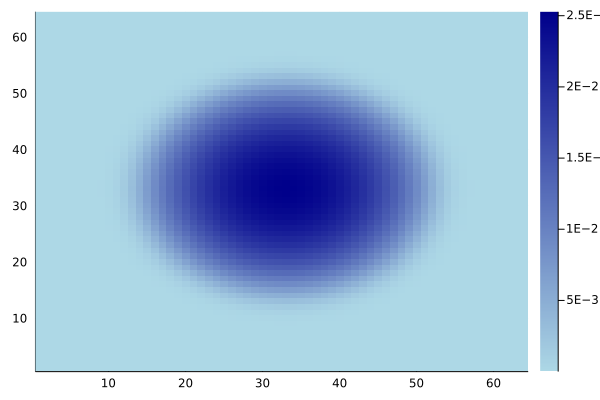

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)